# CST PTM Data Overview

The PTM data from CST has a significant amount of missing data and requires special consideration when normalizing. The starting data is ratio-level-data - where log2 ratios have been calculated from the cancerous cell lines compared to the non-cancerous 'Normal Pool' data from within the 'plex'. This data is under the lung_cellline_3_1_16 directory and each PTM type has its own 'combined_ratios.tsv' file

## Phosphorylation Data
I'll start by having a look at the phosphorylation data that can be found in 

`lung_cellline_3_1_16/lung_cellline_phospho/lung_cellline_TMT_phospho_combined_ratios.tsv`

This file was made using the `process_latest_cst_data.py` script. First I'll make the necessary imports. 

In [79]:
# imports and plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
from copy import deepcopy

# use clustergrammer module to load/process (source code in clustergrammer directory)
from clustergrammer import Network

Next, I'll load the phosphorylation ratio data and simplify the column names (to improve readability)

In [80]:
# load phosphorylation data and export as pandas dataframe: inst_df
net = deepcopy(Network())
filename = 'lung_cellline_3_1_16/lung_cellline_phospho/' + \
'lung_cellline_TMT_phospho_combined_ratios.tsv'
net.load_file(filename)
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

# simplify column names (remove categories)
col_names = inst_df.columns.tolist()
simple_col_names = []
for inst_name in col_names:
    simple_col_names.append(inst_name[0])

inst_df.columns = simple_col_names

I loaded the phosphorylation tsv file using clustergrammer and exported it as a pandas dataframe. We can see that there are 5,798 unique phosphorylation sites measured in all 45 lung cancer cell lines. 

In [81]:
inst_df.shape

(5798, 45)

### Missing Phosphorylation Data
However, there is also a large amount of missing data, e.g. no cell line has all 5798 phosphorylations mesaured. We can plot the number of measured phosphorylation sites (e.g. non-NaN values in the dataframe) below to get a sense of the amount of missing data

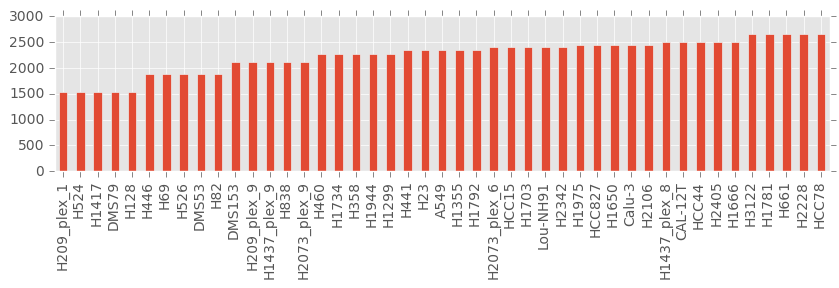

In [82]:
inst_df.count().sort_values().plot(kind='bar', figsize=(10,2))

In the above visualization I have ranked the cell lines based in increasing number of measurements. We can see that there is a pattern in the missing data. The 45 cell lines appear to be aranged into nine groups of 5 cell lines each. These groups correpond to the 9 'plexes', or 'batches', in which the cell lines were measured. Each plex measured one control, Normal Pool, and five cancer cell lines (note that some cell lines have been measured in more than one plex and these have their plex number appended to their name). 

### Cell Line Phosphorylation Distributions

Since each cell line has a large number of measured phosphorylations (at least 1,500) we can reasonably expect that the distributions of phosphorylation levels in the cell lines will be similar. This is based on the assumption that biological variation is not systematic and should not result in consistently higher or lower measurements in the cell lines. 

Below we plot the mean values (ratios) of all measured phosphorylations in each cell line and order the cell lines by their average phosphorylation levels in ascending order. 

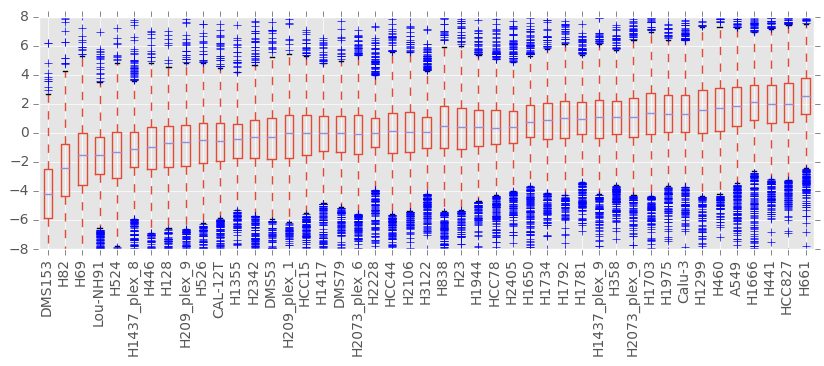

In [83]:
# get the order of the cell lines based on their mean 
sorter = inst_df.mean().sort_values().index.tolist()
# reorder based on ascending mean values
sort_df = inst_df[sorter]
# box plot of PTM values ordered based on increasing mean 
sort_df.plot(kind='box', figsize=(10,3), rot=90, ylim=(-8,8))

We can see that there is a significant difference in the mean phosphorylation level across the cell lines. These large differenecs in the cell line distributions lead us to believe that there is a systematic error in the measurements that needs to be corrected. 

However, each cell line has a different subset of phosphorylations measured so to more fairly compare the cell lines we should only compare commonly measured phosphorylations. 

Below we plot the mean values of phosphorylations that were measured in all cell lines. 

513


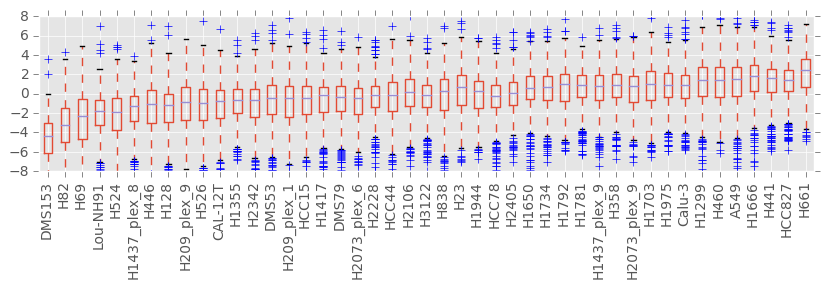

In [84]:
# transpose to get phosphorylations as columns 
tmp_df = sort_df.transpose()

# keep only phosphorylations that are measured in all cell lines
phos_num_meas = tmp_df.count()
phos_all_meas = phos_num_meas[phos_num_meas == 45]
phos_all_meas = phos_all_meas.index.tolist()

# 513 phosphorylations are measured in all cell lines 
print(len(phos_all_meas))

# only keep phospohrylations that are measured in all cell lines 
# I will call this full_df as in no missing measurements
full_df = tmp_df[phos_all_meas]

# transpose back to phosphorylations as rows
full_df = full_df.transpose()

full_df.plot(kind='box', figsize=(10,2), rot=90, ylim=(-8,8))

From the above box plot we can see that there is a significant difference in the distributions of the cell lines even when we only consider phosphorylations that were measured in all cell lines (note that the cell lines are in the same order as the previous box plot). This indicates that this systematic differnce in average phosphorylation values is not caused by missing values. 

Since we do not expect biological variation to cause this type of systematic difference between cell lines we can conclude that the large differences between cell lines are likely the result of systematic experimental error that should be corrected. Normalizing the data will be discussed [here](https://github.com/MaayanLab/CST_Lung_Cancer_Viz)

## Acetylation Data
I will perform the same overview on the acetylation data. There are 1,192 unique acetylations measured in the 45 cell lines. 

In [70]:
# load acetylation data and export as pandas dataframe: inst_df
net = deepcopy(Network())
filename = 'lung_cellline_3_1_16/lung_cellline_Ack/' + \
'lung_cellline_TMT_Ack_combined_ratios.tsv'
net.load_file(filename)
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

# simplify column names (remove categories)
col_names = inst_df.columns.tolist()
simple_col_names = []
for inst_name in col_names:
    simple_col_names.append(inst_name[0])

inst_df.columns = simple_col_names
inst_df.shape

(1192, 45)

### Missing Acetylation Data

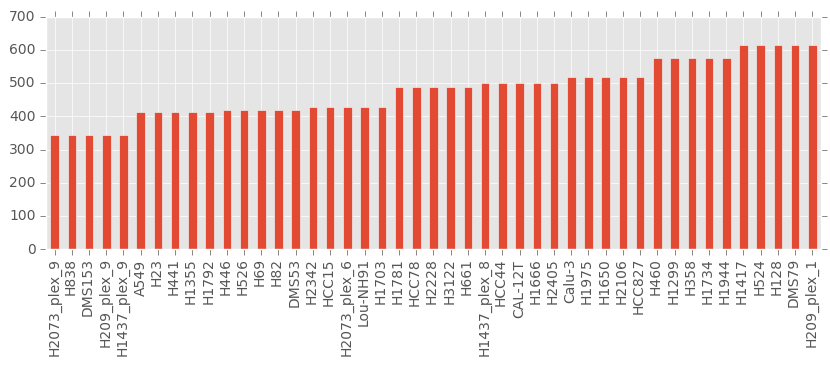

In [71]:
inst_df.count().sort_values().plot(kind='bar', figsize=(10,3))

### Cell Line Acetylation Distributions

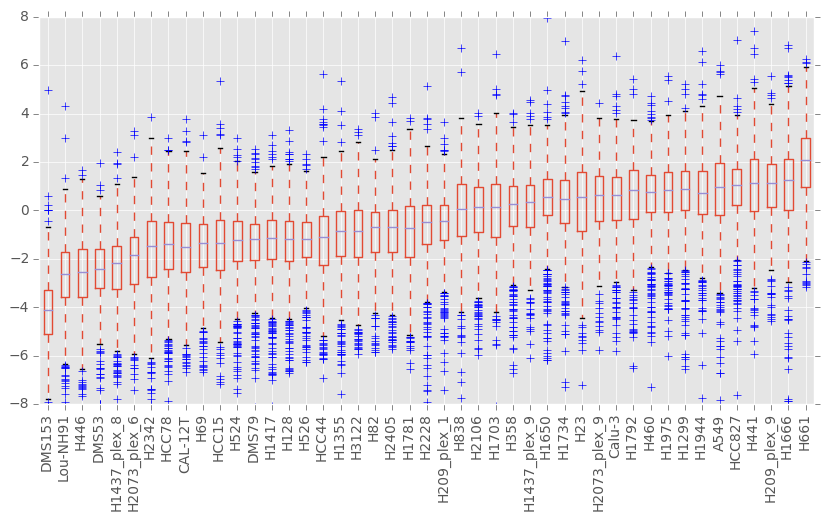

In [74]:
# get the order of the cell lines based on their mean 
sorter = inst_df.mean().sort_values().index.tolist()
# reorder based on ascending mean values
sort_df = inst_df[sorter]
# box plot of PTM values ordered based on increasing mean 
sort_df.plot(kind='box', figsize=(10,5), rot=90, ylim=(-8,8))

Distribution of Acetylation data that was measured in all cell lines

125


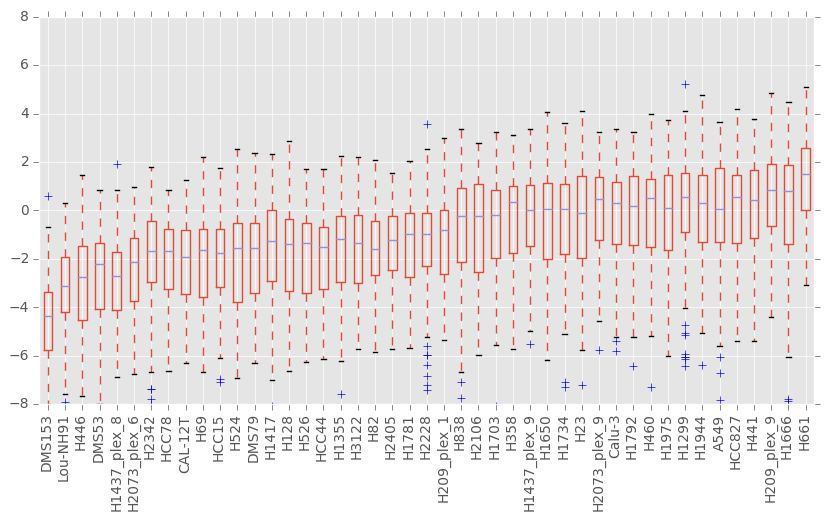

In [75]:
# transpose to get phosphorylations as columns 
tmp_df = sort_df.transpose()

# keep only phosphorylations that are measured in all cell lines
phos_num_meas = tmp_df.count()
phos_all_meas = phos_num_meas[phos_num_meas == 45]
phos_all_meas = phos_all_meas.index.tolist()

# 513 phosphorylations are measured in all cell lines 
print(len(phos_all_meas))

# only keep phospohrylations that are measured in all cell lines 
# I will call this full_df as in no missing measurements
full_df = tmp_df[phos_all_meas]

# transpose back to phosphorylations as rows
full_df = full_df.transpose()

full_df.plot(kind='box', figsize=(10,5), rot=90, ylim=(-8,8))

## Methylation Data
The methylation data has been broken up into Arginine and Lysine methylation. 